# Machine learning german bank credit risk prediction
In this project, I will build a <b>machine learning model to predict credit risk of German Bank's customers</b>. It involves <b>supervised learning (using a labeled training set) for classification</b>, where the <b>target</b> is <b>1</b> if the <b>customer</b> represents a <b>bad risk</b>, and <b>0</b> if he represent a <b>good risk</b>.

I will use the following <b>pipeline:</b>

<b>1. Define the business problem.</b><br>
<b>2. Collect the data and get a general overview of it.</b><br>
<b>3. Split the data into train and test sets.</b><br>
<b>4. Explore the data (exploratory data analysis)</b><br>
<b>5. Data cleaning and preprocessing.</b><br>
<b>6. Model training, comparison, selection and tuning.</b><br>
<b>7. Final production model testing and evaluation.</b><br>
<b>8. Conclude and interpret the model results.</b><br>
<b>9. Deploy.</b><br>


In <b>this notebook</b>, I will perform <b>exploratory data analysis (EDA), covering steps 1 to 4 of the machine learning project pipeline above.</b> The main <b>objective</b> here is to <b>uncover patterns and insights</b> that will give us <b>valuable information about credit risk</b> within the available features. Thus, even before building a model, it will be possible to help the bank with some customer profiles, characteristics of clients and credit services that present higher levels of risk, etc. Furthermore, I will approach these steps in more detail below, with an overview of them and the explanation of why I am making each decision. 

# 1. Business problem

<b>Predict credit risk of German Bank's customers.</b><br>

<b>Credit risk</b> refers to the potential financial loss that a lender, such as a bank, might incur if a borrower fails to repay a loan or credit obligation. It's the uncertainty about whether borrowers will honor their financial commitments.

<b>The German Bank aims to predict their customers' credit risk for several reasons:</b><br>

<b>1. Risk Assessment:</b> By predicting whether a customer is a good or bad risk, banks can assess the likelihood of loan defaults or late payments, helping them make informed lending decisions.<br>
<b>2. Profitability:</b> Accurate credit risk prediction allows banks to offer appropriate interest rates based on a customer's risk profile, ensuring fair compensation for the level of risk involved.<br>
<b>3. Minimize Losses:</b> Identifying high-risk customers helps banks allocate resources effectively, focusing more attention on potential problem cases and minimizing potential financial losses.<br>
<b>4. Compliance:</b> Regulatory requirements often mandate that banks maintain certain levels of capital reserves to cover potential credit losses. Accurate risk prediction aids in regulatory compliance.<br>
<b>5. Customer Segmentation:</b> Predicting credit risk allows banks to segment customers based on risk profiles, tailoring financial products and services to individual needs and risk tolerance.<br>
<b>6. Strengthen Trust:</b> Sound risk assessment builds trust with customers, as banks can demonstrate responsible lending practices and transparency.<br>

By employing <b>predictive models</b>, <b>the German Bank</b> can make <b>informed decisions</b> that <b>balance profit generation with prudent risk management</b>, ultimately benefiting both the institution and its customers. Thus, the project objective is to build a model that is able to identify as many as possible bad risk customers and provide valuable insights about credit risk within the available features. By doing this, the business problem will be solved.

### Importing the libraries

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data and clustering.
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Utils
from eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Seaborn grid style.
sns.set_theme(style='whitegrid')

# 2. Understanding the data
- The dataset was collected from kaggle: https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk
- The dataset makes part of the UCI Machine Learning repository.

In [2]:
df = pd.read_csv('data/german_credit_data.csv')
# Dropping useless column.
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Data dictionary
<b>1. Age</b> (numeric)<br>
<b>2. Sex</b> (text: male, female)<br>
<b>3. Job</b> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>4. Housing</b> (text: own, rent, or free)<br>
<b>5. Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>6. Checking account</b> (numeric, in DM - Deutsch Mark)<br>
<b>7. Credit amount</b> (numeric, in DM)<br>
<b>8. Duration</b> (numeric, in month)<br>
<b>9. Purpose</b> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>
<b>10. Risk</b> (text: target, good risk and bad risk)<br>

Looking at dataset general information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 1000 rows and 10 columns.


There are some missing values in Checking account and Saving accounts. Furthermore, the features seem to be in the correct data types.

Looking at some descriptive statistics.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


Some interesting points:
1. The average age is approximately 36 years.
2. The average credit amount is approximately 3271. 
3. The average credit service duration is 21 months.
4. Looks like there are some outliers.

Looking at missing and duplicated values.

In [7]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are some missing values in Checking account and Saving accounts. Moreover, there are not duplicated values.

Target (Risk) and Sex can be expressed as binary features. I will label bad risk as 1 and good risk as 0, because the idea is to accurately predict bad risk customers in order to avoid defaults and so on. Moreover, I will label male as 1 and female as 0.

In [9]:
df['Risk'] = df['Risk'].map({'bad': 1, 'good': 0})
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 3. Split the data into train and test sets
- First of all, I will split the data into train and test sets.
- Test set is supposed to be data the model has never seen before.
- I will perform EDA focusing on the training set in order to avoid data leakage, get a realistic representation and evaluate the model correctly with new unseen data.
- I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, which is the case, as there are more good risk customers than bad risk ones.

In [10]:
X = df.drop(columns=['Risk'])
y = df['Risk'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (800, 9).
Train target dataset shape: (800,).
Test predictor dataset shape: (200, 9).
Test target dataset shape: (200,).


In [12]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64

Test target proportion: 
Risk
0    0.7
1    0.3
Name: proportion, dtype: float64


The target proportion of each class is preserved.

# 4. Exploratory data analysis
I will explore the training set in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights from the data, especially regard to the target variable (Risk). Thus, I will do univariate, bivariate and multivariate analysis of the data.

I will get an entire train set (with predictor and target features) in order to use seaborn 'hue' parameter for visualizations and look at the correlation matrix.

In [13]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
828,47,1,2,free,NaN,little,8335,36,car,1
997,38,1,2,own,little,NaN,804,12,radio/TV,0
148,28,1,2,own,little,little,5371,36,furniture/equipment,0
735,29,0,0,own,NaN,moderate,3990,36,domestic appliances,0
130,24,0,2,own,NaN,moderate,8487,48,car,0


I will get categorical features, numerical features and target feature separate lists in order to turn data visualization and exploration easier.

In [14]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'Risk'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 5 numerical features. They are: 
['Age', 'Sex', 'Job', 'Credit amount', 'Duration']

There are 4 categorical features. They are: 
['Housing', 'Saving accounts', 'Checking account', 'Purpose']

The target feature is: Risk.


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [15]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

Housing
----------------------------------------
There are 3 unique values. They are: 
Housing
own     0.7125
rent    0.1800
free    0.1075
Name: proportion, dtype: float64

Saving accounts
----------------------------------------
There are 4 unique values. They are: 
Saving accounts
little        0.724085
moderate      0.137195
quite rich    0.076220
rich          0.062500
Name: proportion, dtype: float64

Checking account
----------------------------------------
There are 3 unique values. They are: 
Checking account
little      0.452479
moderate    0.442149
rich        0.105372
Name: proportion, dtype: float64

Purpose
----------------------------------------
There are 8 unique values. They are: 
Purpose
car                    0.34750
radio/TV               0.26875
furniture/equipment    0.18625
business               0.09875
education              0.05625
repairs                0.02250
domestic appliances    0.01250
vacation/others        0.00750
Name: proportion, dtype: float64



Insights:
1. Saving accounts and Checking accounts present an ordinal relationship. Ordinal encoder might be a good choice for encoding them.
2. Purpose has a higher cardinality comparing to the other categorical features. As I have a little amount of data, target encoder might be a good choice for encoding it. Applying one hot encoder would increase dimensionality, favoring overfitting. 
3. Housing doesn't have an ordinal relationship. Thus, target encoder would also be good for encoding it.

Moreover, I will do univariate, bivariate and multivariate analysis of these features below in order to uncover patterns and insights.

### Univariate analysis
I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

### Target distribution

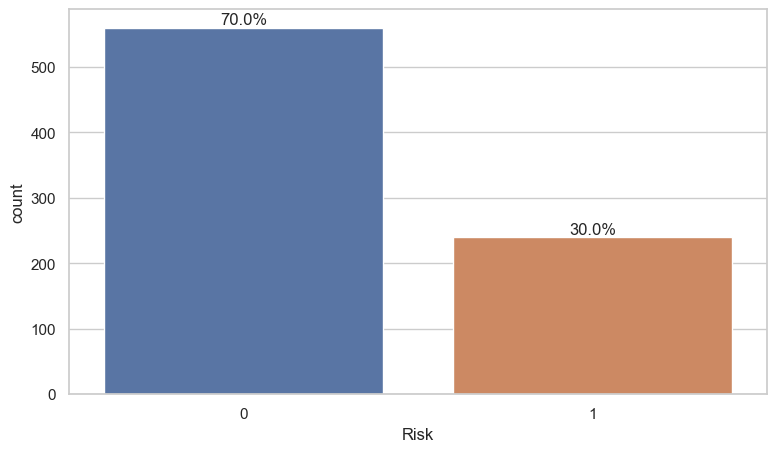

In [16]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=train, x='Risk')

total = len(train)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2 
    y = count.get_height()
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='bottom')
plt.show()

The target is slightly imbalanced. 30% of the customers are bad risk. Thus, I will adopt some strategies in order to deal with this, because I only have 1000 rows of data. They are:
1. Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.
2. Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a bad risk customer. These weights are defined on the model specific hyperparameter for it.
3. Take a look at precision vs recall trade-off if necessary. The objective is to predict as many as possible bad risk customers, so a high recall must be the priority.

### Numerical features distributions
I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the bank's customers numeric attributes.

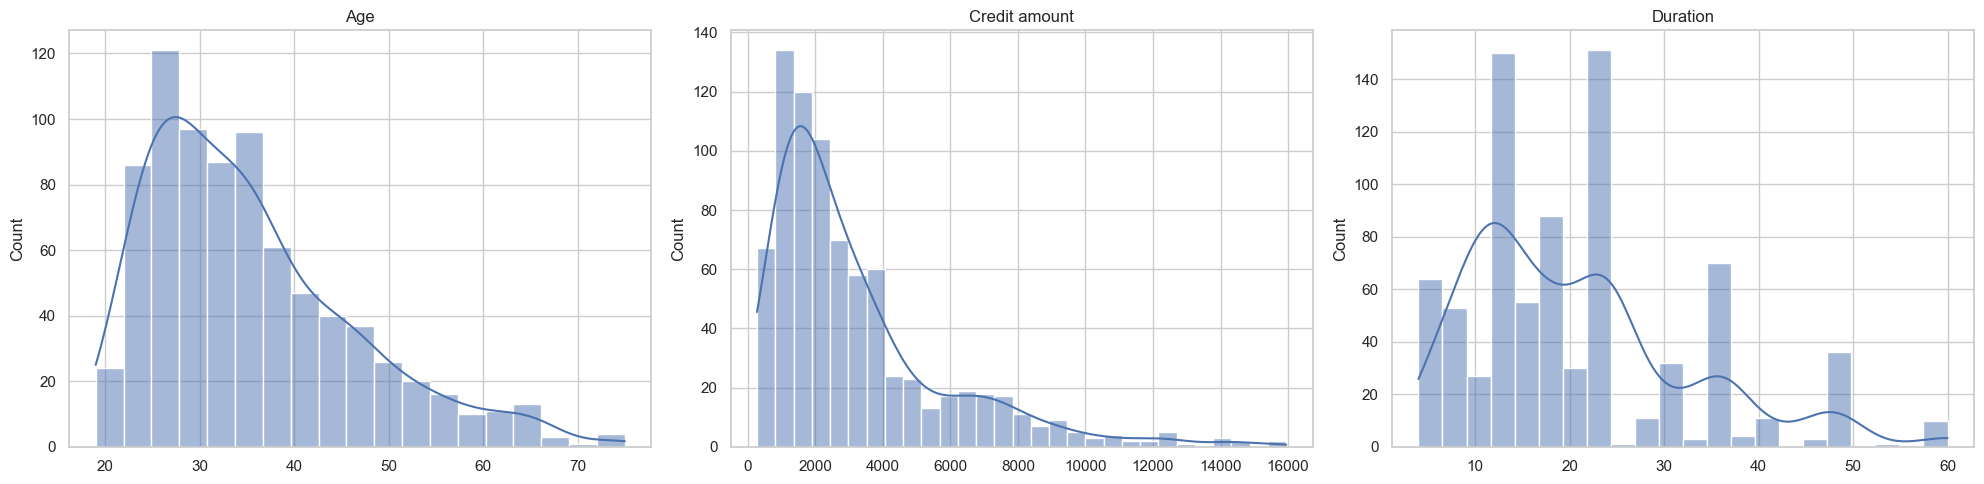

In [17]:
histplot_boxplot_features = ['Age', 'Credit amount', 'Duration']

sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True)

Insights:
1. Most of the customers are between 20 and 40 years old.
2. As expected, the distribution of credit amounts is skewed to the right. Most customers have low credit amounts, while there are some outliers with very high credit balances.
3. A significant portion of the customers stay for either 12 or 24 months while using the bank's credit service.

### Outliers
I will look at outliers in the data in order to see if they represent inconsistent information like measurement errors. Once I do this, I will decide if I will treat them or not. Moreover, I will plot boxplots below for visualization purposes.

In [18]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histplot_boxplot_features)

There are 133 outliers in the dataset.

Number (percentage) of outliers per feature: 

Age: 25 (3.12)%
Credit amount: 58 (7.25)%
Duration: 50 (6.25)%


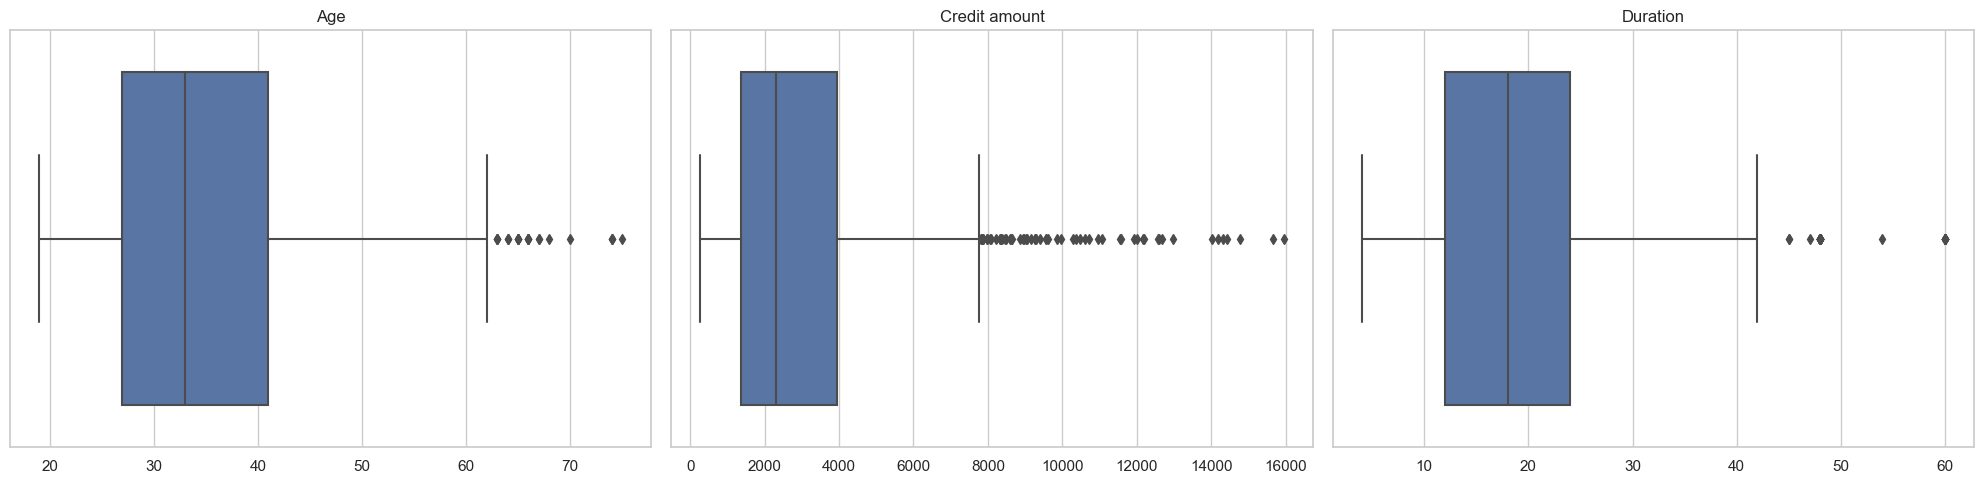

In [19]:
sns_plots(data=train, features=histplot_boxplot_features, outliers=True)

I will not drop any outlier because I have a little amount of data (just 1000 rows). Anyway, the outliers don't represent inconsistent information. Naturally, some customers will have a higher credit amount, be older and stay more time consuming the bank credit service.

### Categorical features distributions
I will look at categorical features countplots below in order to see which are the most common characteristics of the bank's customers. Moreover, I will include Sex and Job in these plots because Sex is binary and Job has just a few values, which are more easy to visualize in a countplot.

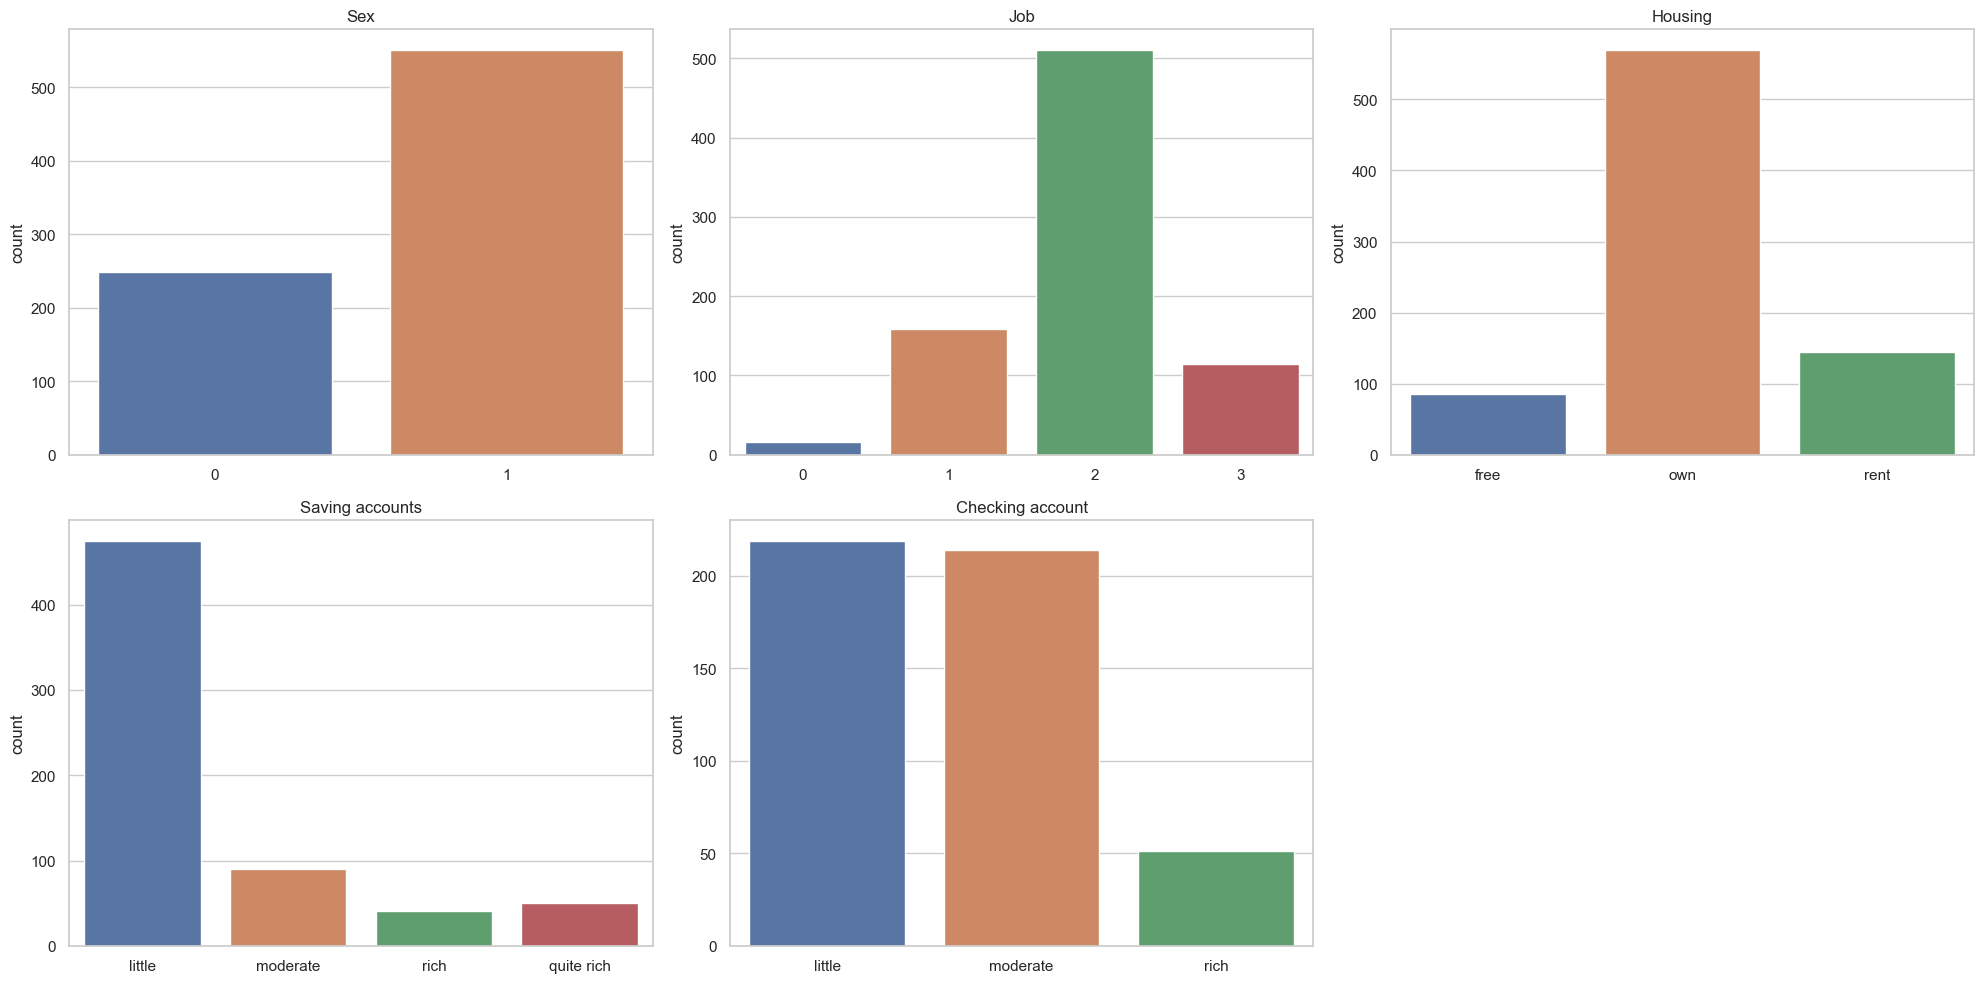

In [20]:
countplot_barplot_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account']

sns_plots(data=train, features=countplot_barplot_features, countplot=True)

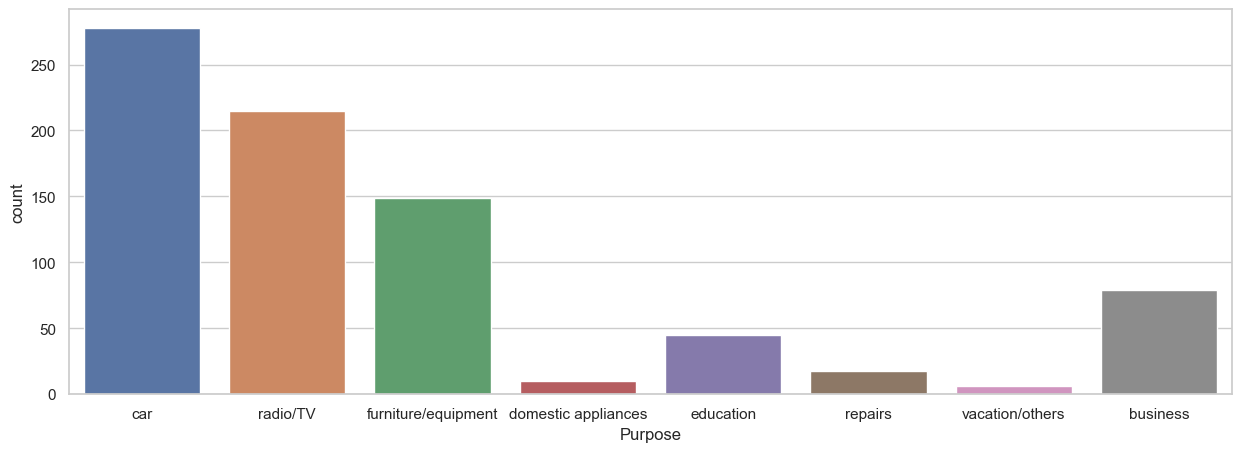

In [21]:
# Plotting purpose separately.
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=train, x='Purpose')
plt.show()

Insights:
1. There are more than twice as many male customers as female ones.
2. Most of the customers jobs are skilled.
3. Most of the customers have their own house.
4. Most of the customers have little saving accounts.
5. Most of the customers have little or moderate checking account.
6. Most of the customers took out credit with the bank for car, radio/tv and furniture/equipment purposes.


### Bivariate and multivariate analysis
I will do bivariate and multivariate analysis below in order to see how the features are related to each other, particularly with the target variable (Risk).

### Correlation matrix
I will examine the correlation matrix in order to identify any linear relationships between the features in the data, particularly with the target variable, and assess the strength and direction of these relationships.

In [22]:
corr_matrix = train.corr(numeric_only=True)

In [23]:
corr_matrix['Risk'].sort_values(ascending=False)

Risk             1.000000
Duration         0.206301
Credit amount    0.138776
Job              0.019113
Age             -0.057750
Sex             -0.084246
Name: Risk, dtype: float64

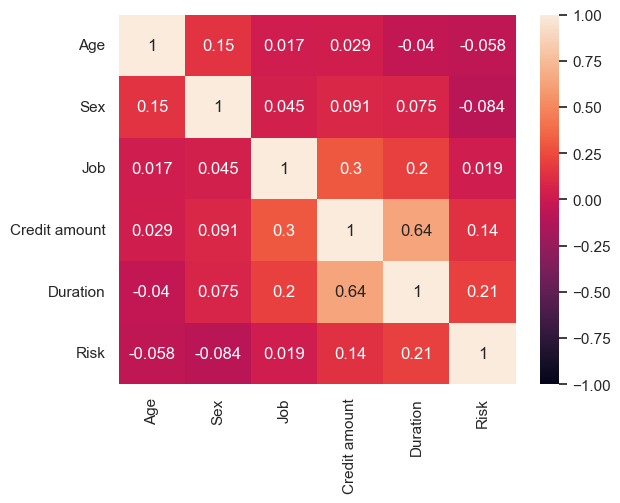

In [24]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights:
1. Credit amount and Duration are weakly positively correlated with the target. It makes sense because higher credit amounts tend to be associated with longer credit service durations, thus indicating a higher level of risk, while lower credit amounts tend to be associated with shorter credit service durations, presenting a lower level of risk.
2. Duration and credit amount are strongly positively correlated. Thus, when the duration of a credit service (such as a loan) is longer, the associated credit amount is generally higher, and when the duration is shorter, the associated credit amount tends to be lower. It makes total sense, higher loan amounts demand more time for being paid while lower loan amounts demand less time for being paid, for example.
3. Credit amount and Job are moderately positively correlated. Thus, customers with more skilled jobs tend to have higher credit amounts and customers with less skilled jobs tend to have lower credit amounts.

I will look at seaborn pairplot below to illustrate the insights above.

### Pairplot

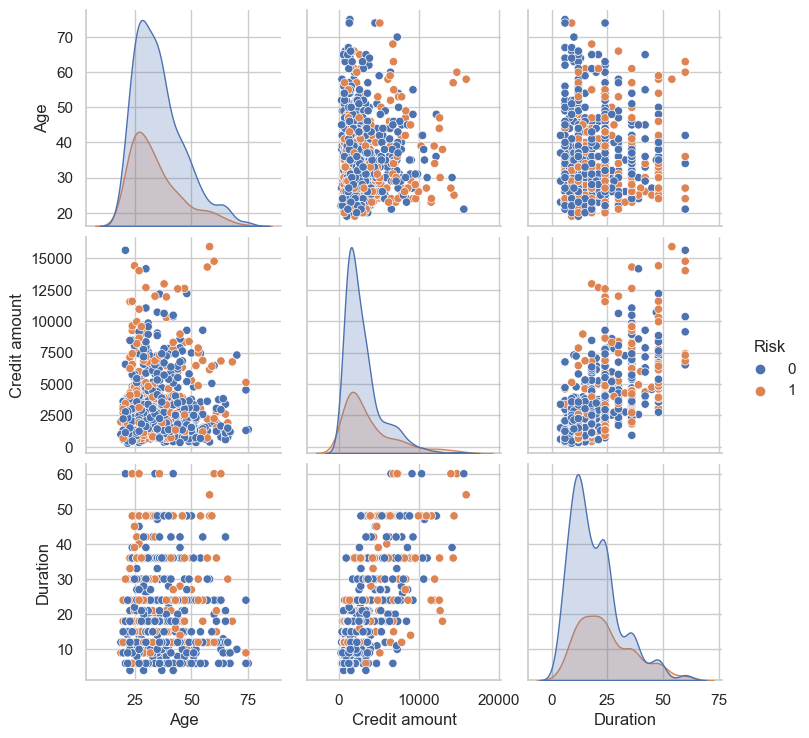

In [25]:
sns.pairplot(data=train, hue='Risk', vars=histplot_boxplot_features)
plt.show()

### Numerical features vs Risk
I will look at bad risk and good risk customers numerical distributions below in order to see if there is any significant difference between them.

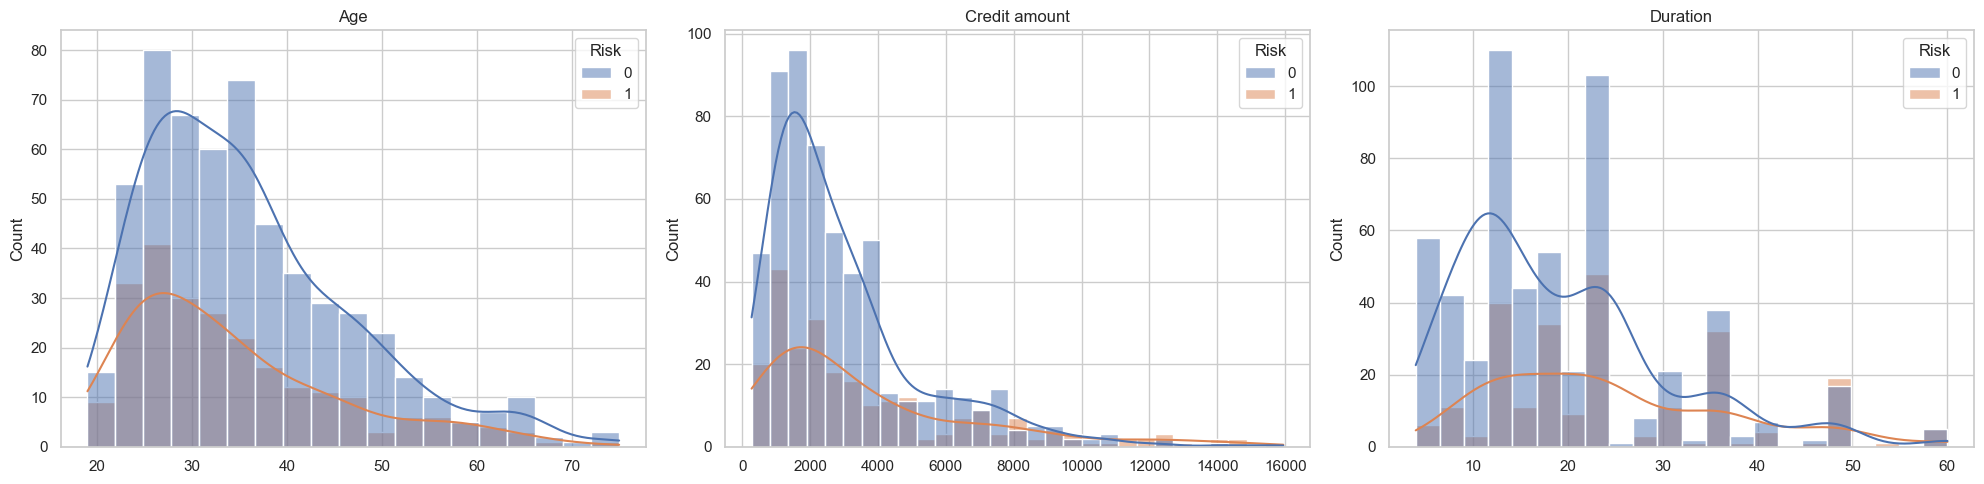

In [26]:
sns_plots(data=train, features=histplot_boxplot_features, histplot=True, kde=True, hue=target)

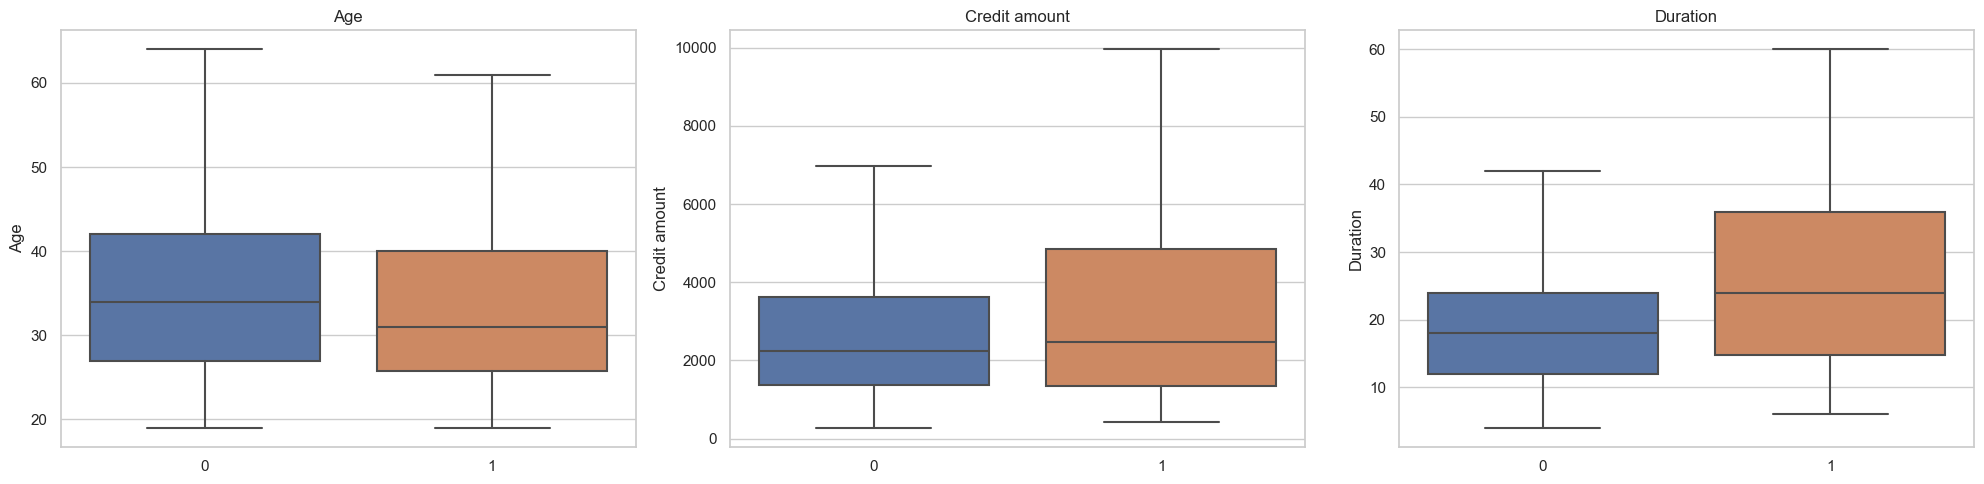

In [27]:
sns_plots(data=train, features=histplot_boxplot_features, boxplot=True, boxplot_x=target)

Insights:
1. Bad risk customers are slightly younger compared to good risk ones. This makes total sense because young people generally don't have financial stability.
2. Bad risk customers tend to borrow higher credit amounts compared to good risk ones. This was expected since higher credit amounts present higher levels of risk as they're harder to pay.
3. Bad risk customers tend to use credit services for longer durations compared to good risk ones. This was expected because, as I saw above, when the duration of a credit service (such as a loan) is longer, the associated credit amount is generally higher and thus the levels of risk are so. Furthermore, the more time a client spends not paying the credit service he is using, the higher the risk of default.

### Categorical features vs Risk
I will look at how bad risk and good risk customers are distributed over different categorical features categories in order to see which are the categories with higher proportions of bad risk customers.

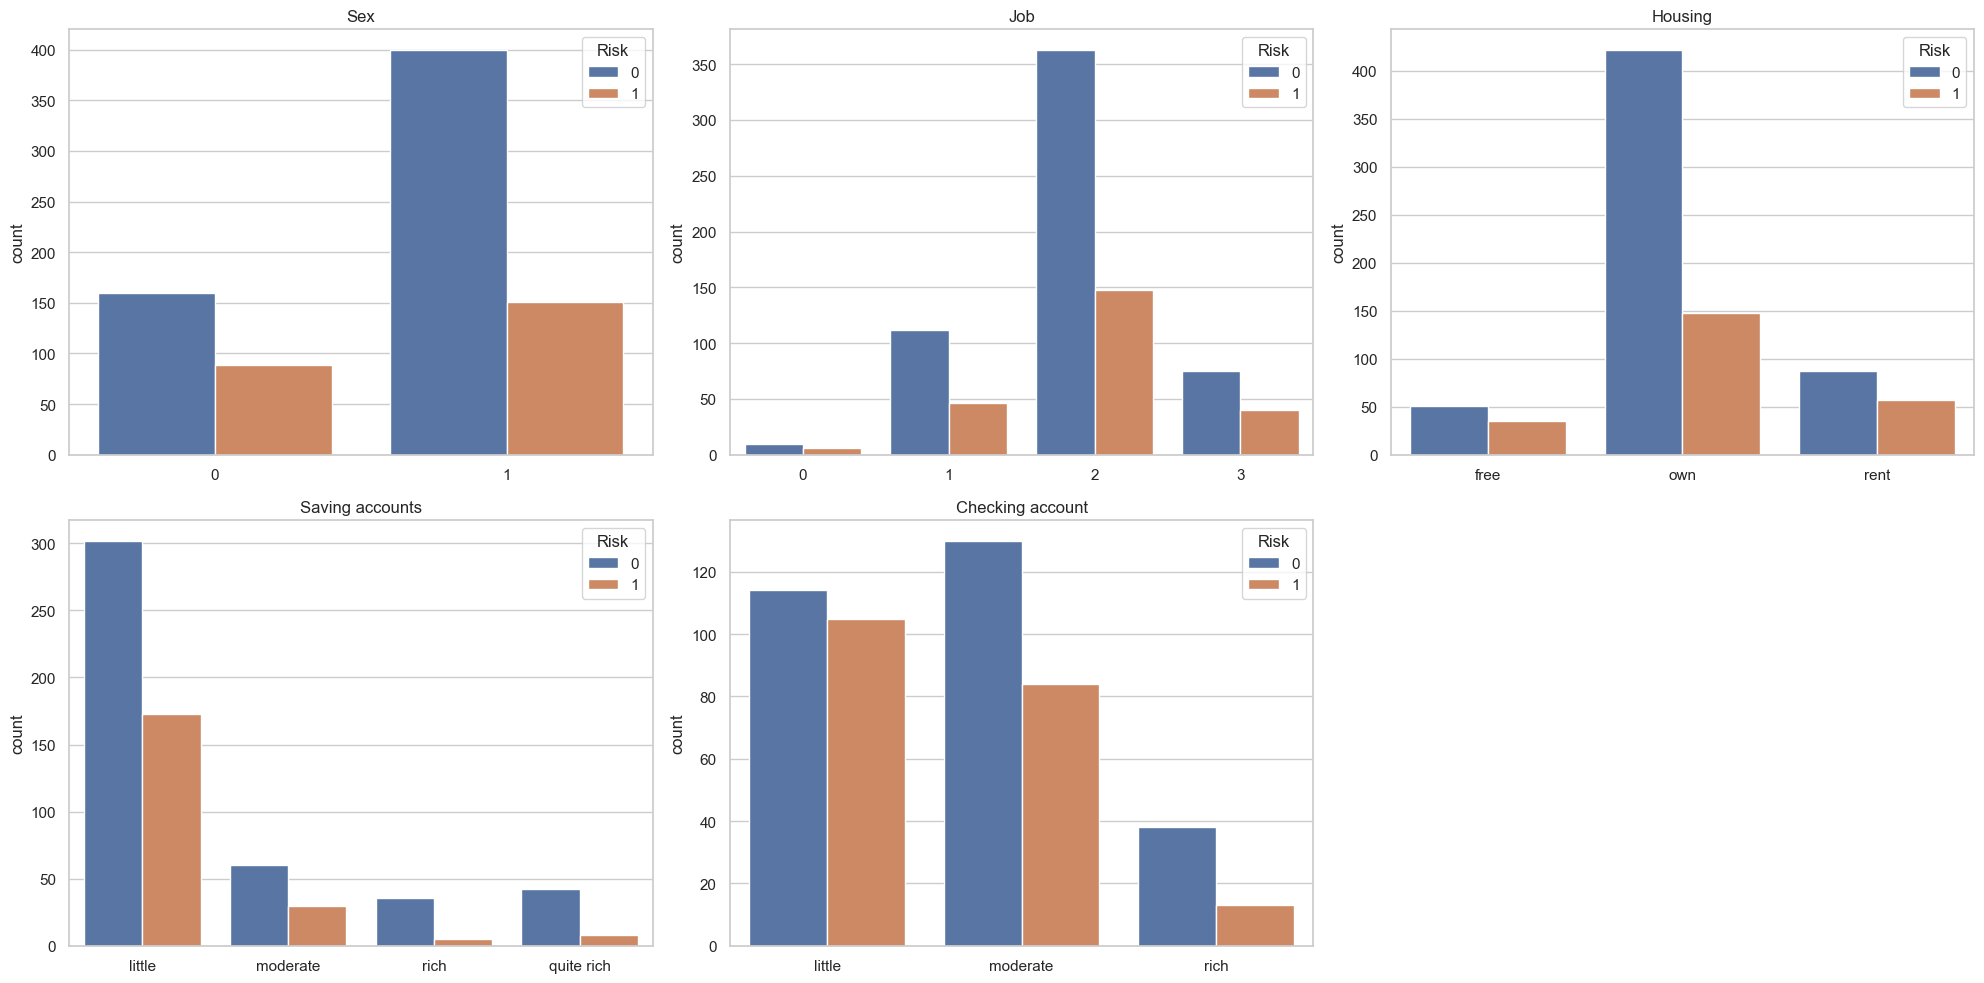

In [28]:
sns_plots(data=train, features=countplot_barplot_features, countplot=True, hue=target)

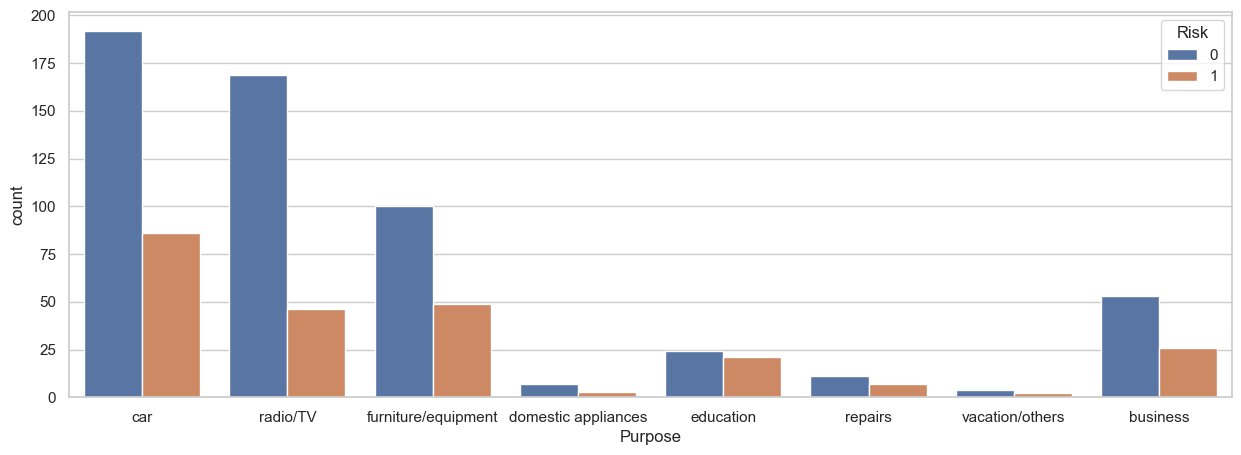

In [29]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='Purpose', hue='Risk')
plt.show()

Insights:
1. The bad risk proportion is higher in female customers. Approximately 36% of the female customers are bad risk while for male customers this proportion falls down to 27%. 
2. The bad risk proportion is higher in free and rent housing customers. Approximately 40% of the customers in these housing domains are bad risk while for those who have their own house this proportion falls down to 26%.
3. As expected, customers with little and moderate saving accounts tend to present higher levels of risk. The opposite is true for those with rich and quite rich saving accounts. This makes total sense because clients with high saving account balances can pay their credit services much more easier than those with lower balances. Proportionally speaking, bad risk customers are approximately 3 times more frequent in little and moderate saving accounts when compared to rich and quite rich saving accounts.
4. The same is true for Checking account. Specially, almost 50% of the customers with little checking account are bad risk. The bank must be alert with this!
5. Interestingly, almost 50% of the customers who took out credit with the bank for education purposes are bad risk. This makes sense because those who are investing in education probably are younger and financially unstable. They must be people striving to study and build their lives.
6. Moreover, I focused on bad and good risk proportions in different categorical features domains because naturally the domains with more observations (counts) will have more bad risk customers. This can be observed in all the variables above.

### Categorical features vs Credit amount
I will examine relationships among some features and Credit amount below in order to see which are the characteristics of customers who take (on average) higher credit amounts and consequently present higher levels of risk. 

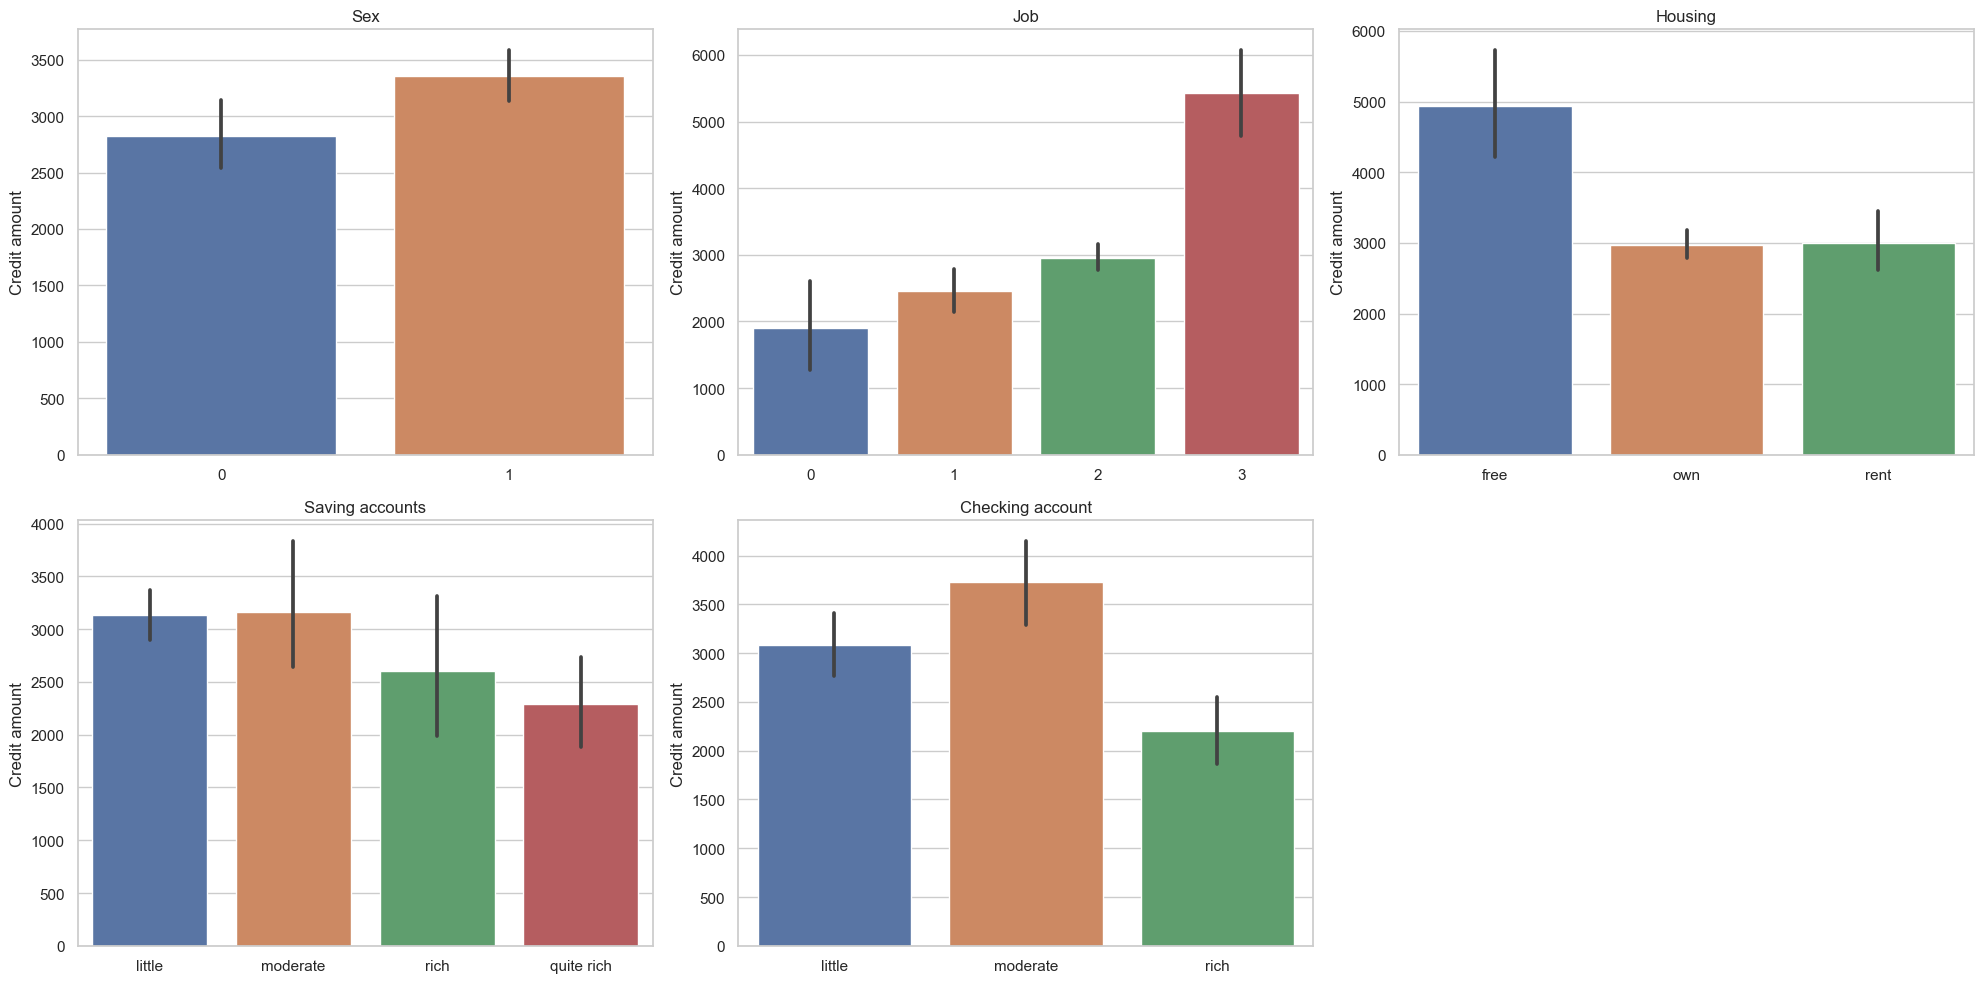

In [30]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='Credit amount')

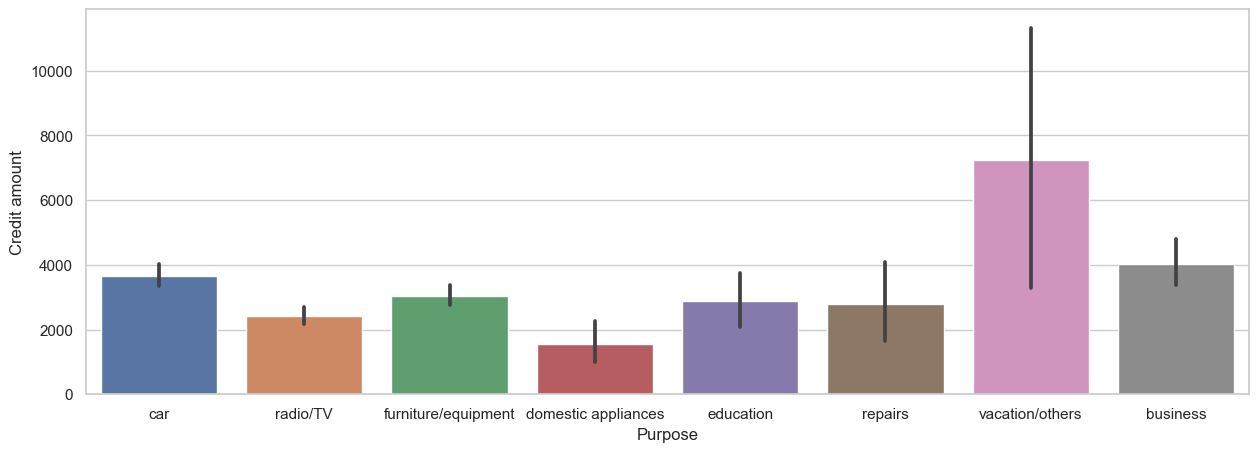

In [31]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='Purpose', y='Credit amount')
plt.show()

Insights:
1. On average, customers who hold highly skilled jobs borrow higher credit amounts from the bank.
2. On average, customers within free housing category borrow higher credit amounts from the bank.
3. On average, customers who took out credit with the bank for vacation/others purpose borrow higher credit amounts from the bank.

#### Categorical features vs Duration
I will examine relationships among some features and Duration below in order to see which are the characteristics of customers who take credit services with longer durations and consequently present higher levels of risk.

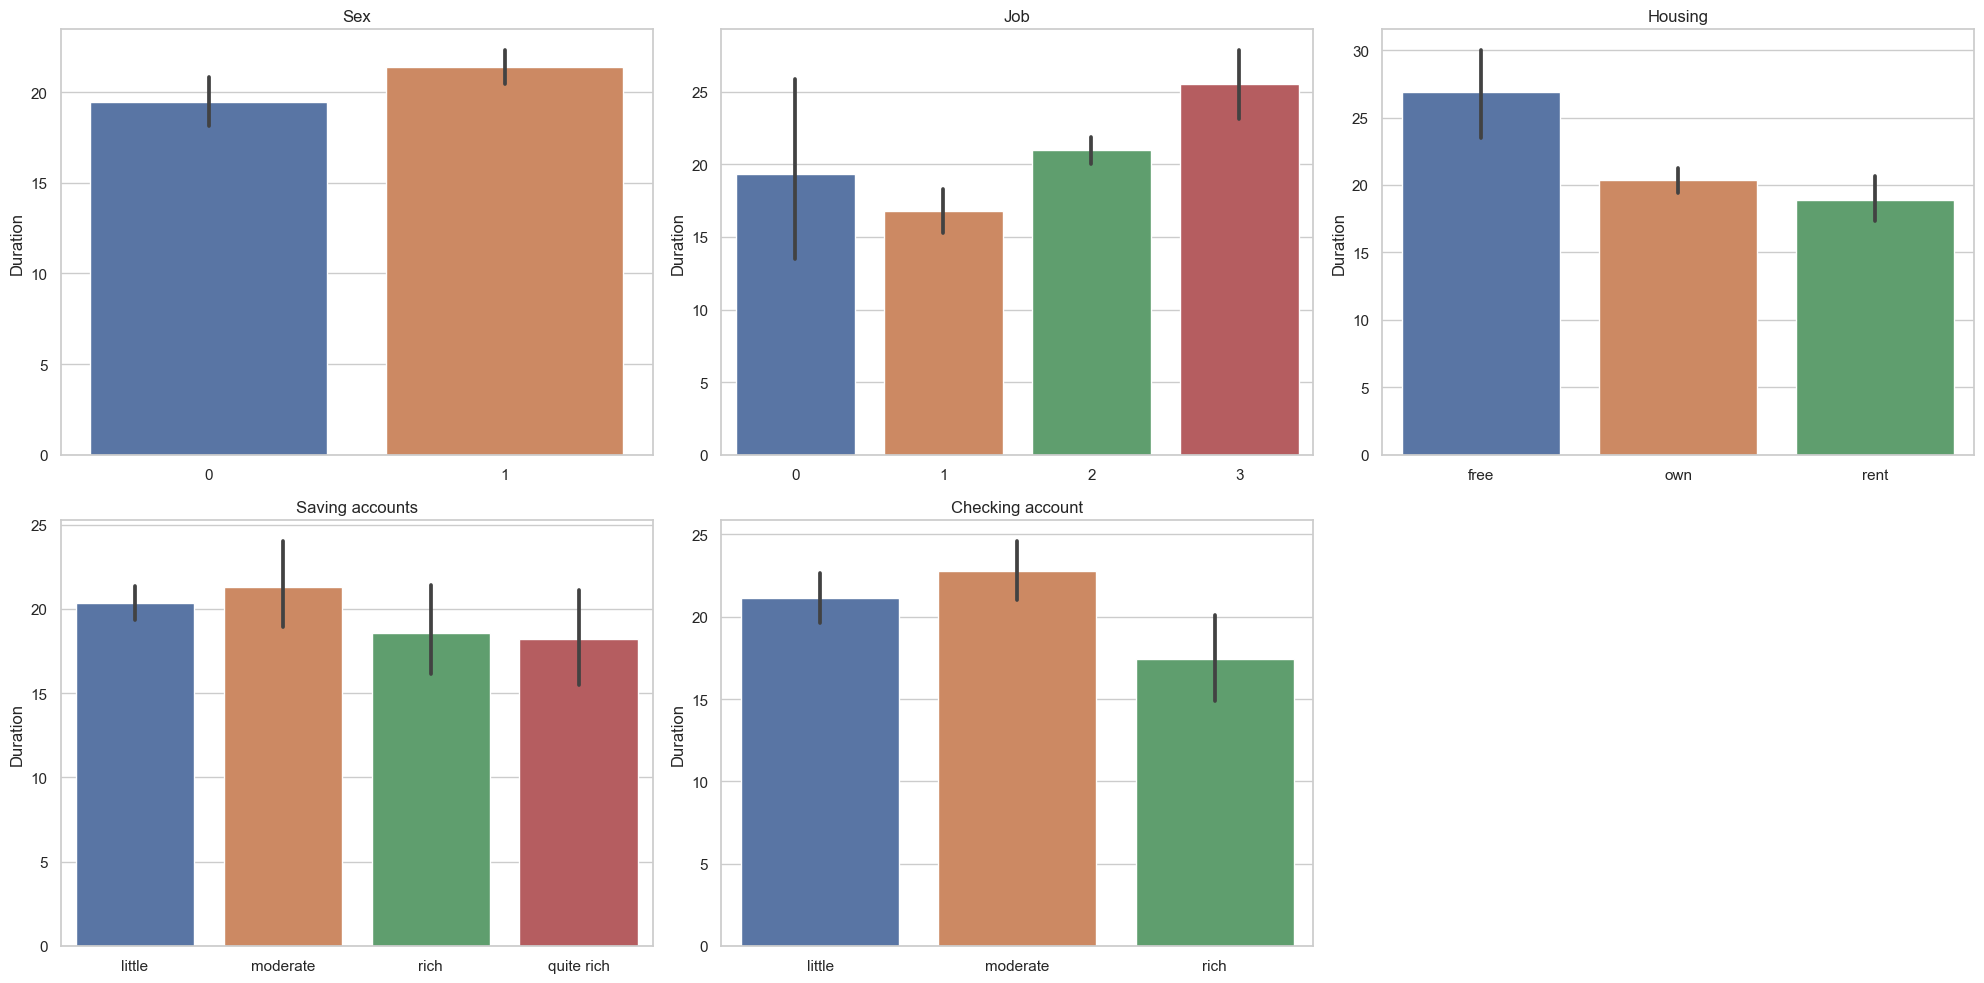

In [32]:
sns_plots(data=train, features=countplot_barplot_features, barplot=True, barplot_y='Duration')

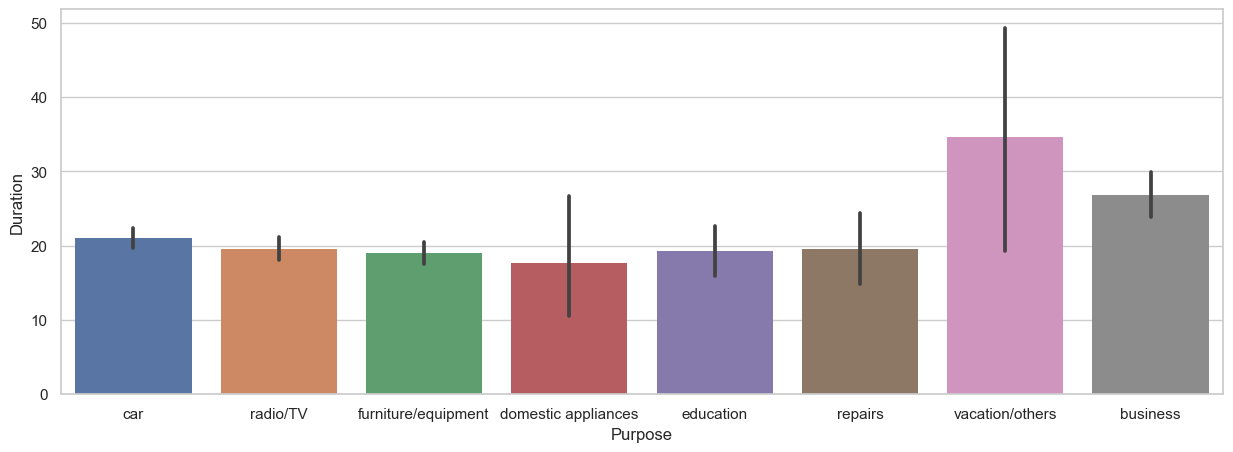

In [33]:
# Plotting Purpose separately.
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='Purpose', y='Duration', linewidth=0)
plt.show()

Insights:
1. Interestingly, the same patterns found for average credit amount are present here. This was expected, since credit amount and duration are strongly positively correlated.
2. In resume, on average, customers who hold highly skilled jobs, free housing, and took out credit with the bank for vacation/others purpose use longer duration credit services.

### Credit amount and Durations vs Risk
I will group the customers by risk in order to see how much credit was given to bad risk customers, what is the proportion of credit amount given for bad and good risk customers and what is the average duration of credit services that were taken by each of these groups.

In [34]:
amount_duration_risk = train.groupby(['Risk'], as_index=False).agg({'Credit amount': 'sum', 'Duration': 'mean'})
amount_duration_risk['Percentage'] = amount_duration_risk['Credit amount'] / amount_duration_risk['Credit amount'].sum()
amount_duration_risk

,Risk,Credit amount,Duration,Percentage
0,0,1650236,19.175000,0.646727
1,1,901437,24.491667,0.353273


### Clustering
I will cluster the data in order to assess customers groups regard to some important features like credit amount and duration. By doing this, I will get a good idea of some hidden group tendencies in the data.

### K-Means
I will apply clustering with K-Means algorithm. It works with the steps below:
1. Initialize K centroids randomly. We define K before running the algorithm.
2. Label the instances. Each instance will be assigned to the cluster with the closest centroid. It uses the Euclidean Distance for calculating distances.
3. Update the centroids by taking the average of the instances in each cluster.
4. Repeat these steps until the centroids positions don't change anymore.

To determine the optimal number of clusters/centroids K, there are two methods:
1. Elbow Method: Uses the inertia (within cluster sum of squares). The inflexion point is chosen because the number of clusters before it (less clusters) and after it (more clusters than necessary) are suboptimal.
2. Silhouette Score: The silhouette score for an instance is given by (b-a)/max(a, b) where a is the mean intra-cluster distance and b is the mean nearest-cluster distance. It ranges from -1 to 1. The closer to 1 the better. A silhouette score close to 0 indicates that the instance is next to a cluster boundary. A silhouette score close to -1 indicates that the instance is in the wrong cluster.

I will choose K using the elbow method because I am clustering the data just for visualization and insight purposes.

### Age vs Duration clustering

In [35]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['Age', 'Duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

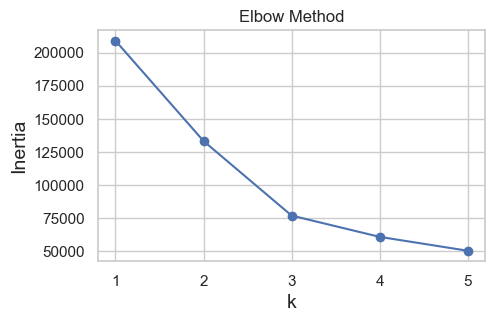

In [36]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 3 is the optimal number of clusters by the elbow method.

In [37]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=3)
k_means.fit(clustering_df)

KMeans(n_clusters=3)

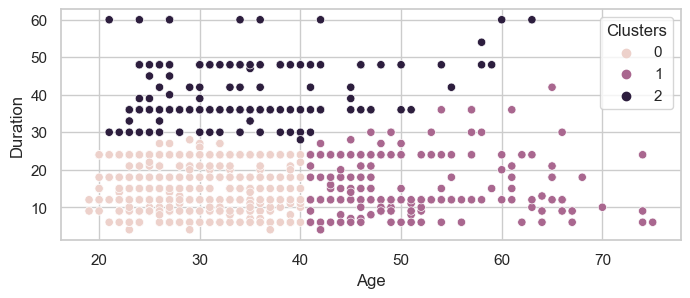

In [38]:
# Plotting the clustering result.

clustering_df['Clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='Age', y='Duration', hue='Clusters')
plt.show()

Insights about the groups formed:
1. Group 0: Older customers (from 40 to 70 years old) that take credit services with short durations (from 10 to 30 months).
2. Group 1: Young customers (from 20 to 40 years old) that take credit services with short durations (from 10 to 30 months). These customers might be people who don't have financial stability and take low loan values for purposes like education and so on.
3. Group 2: Customers who take credit services with longer durations. These customers might be people that represent a high level of risk and take credit for purposes like vacation/others.

### Credit amount vs Duration clustering

In [39]:
# Getting inertias of different number of clusters K K-Means models.

clustering_df = train[['Credit amount', 'Duration']]

different_k_kmeans = [KMeans(n_clusters=k, random_state=42).fit(clustering_df) for k in range(1, 6)]
inertias = [model.inertia_ for model in different_k_kmeans]

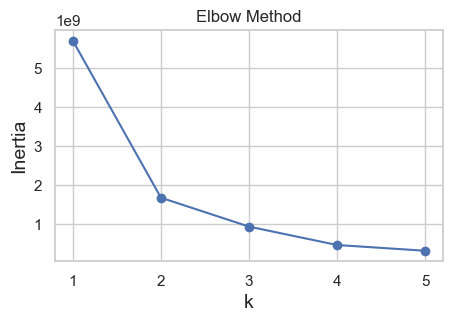

In [40]:
# Plotting curve for elbow method.

plt.figure(figsize=(5, 3))
plt.title('Elbow Method')
plt.plot(range(1, 6), inertias, 'bo-')
plt.xlabel('k', fontsize=14)
plt.xticks(range(1, 6))
plt.ylabel('Inertia', fontsize=14)
plt.show()

Clearly, 2 is the optimal number of clusters by the elbow method.

In [41]:
# Applying K-Means clustering with the optimal number of clusters.

k_means = KMeans(n_clusters=2)
k_means.fit(clustering_df)

KMeans(n_clusters=2)

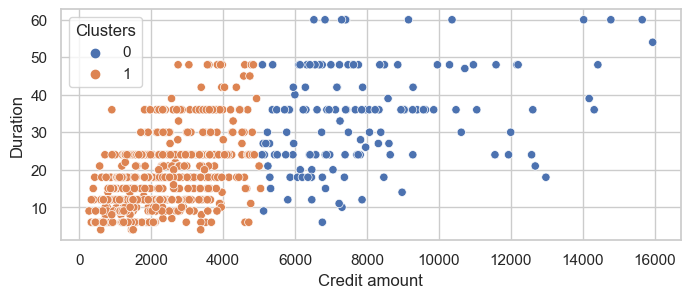

In [42]:
# Plotting the clustering result.

clustering_df['Clusters'] = k_means.labels_

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering_df, x='Credit amount', y='Duration', hue='Clusters')
plt.show()

Insights about the groups formed:
1. Group 0: Customers who take lower credit amounts from the bank (from 0 to 5000) with various durations (from 0 to 50 months).
2. Group 1: Customers who take higher credit amounts from the bank (from 5000 to 16000) with various durations (from 0 to 60 months). The credit services with longer durations were taken by this group.

### EDA conclusions
<b>Main insights:</b><br>
<b>1.</b> Young customers tend to present higher credit risk. This makes sense since younger people usually don't have financial stability.<br>
<b>2.</b> Customers who take higher credit amounts from the bank tend to present higher risk. This makes total sense. The higher the credit amount taken, the harder it is to pay it.<br>
<b>3.</b> Customers whose credit services have a long duration present higher risk. The more time a customer spends using a credit service without paying it, the higher the risk of default.<br>
<b>4.</b> Credit amount and Duration are strongly positively correlated. Credit services with longer durations generally are associated with higher credit amounts and vice-versa. Furthermore, a weak positive correlation exists between these two features and risk. This makes sense because a customer holding a credit service for a longer duration with a high credit amount taken presents higher risk.<br>
<b>5.</b> Customers with little saving and checking accounts tend to present higher credit risk. Particularly, almost 50% of the customers who have little checking accounts are bad risk ones.<br>
<b>6.</b> When a customer takes credit from the bank for vacation/others and education purposes, the bank must be alert. Almost 50% of the customers who take credit for education are bad risk. Moreover, vacation/others purpose presents the higher average credit amount and duration compared to all of the other purposes. Thus, these categories represent higher risk levels.<br>
<b>7.</b> In terms of profile, most of the customers are:<br>
    - Male.<br>
    - Around 36 years old.<br>
    - Hold a skilled job.<br>
    - Have their own house.<br>
    - Take low credit amounts.<br>
    - Utilize the bank's credit service for 12 or 24 months.<br>
    - Have little and little/moderate saving and checking accounts.<br>
    - Take credit for car, radio/TV and furniture/equipment purposes.<br>